# Final Project

## Best Neighborhood in Pittsburgh PA

**Our Metric for determining the best neighborhood is walkability**

**First lets import all the nessesary tools**

In [18]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import fpsnippets

**First Dataset (Misael)**

##### Lets import all the data that contains information on locations of convenience Store/Super Market

In [19]:
df = pd.read_csv("data-conveniencesupermarkets.csv")
df.head()

,Client ID,Name,Legal Name,Start Date,Street #,Street Name,State,Zip,Lat,Lon,Accuracy,Category
0,201211150002,Avalon Fuel,Avalon Fuel Company,10/26/2012,901,Ohio River Blvd,PA,15202.0,40.495759,-80.066508,9.0,Convenience Store
1,201511040005,Ez Energy #303/7Eleven #36183H,Neelkanth Ansh Enterprises Inc,10/26/2015,209,Ohio River Blvd,PA,15143.0,40.545418,-80.194152,9.0,Convenience Store
2,201212130003,EZ Energy #311 / 7 Eleven #36191H,7 Eleven Inc,12/3/2012,8136,Ohio River Blvd,PA,15202.0,40.510522,-80.094268,9.0,Convenience Store
3,201211190006,Getgo #3646 / Crafton - Ingram,Giant Eagle Inc,11/15/2012,280,Crafton Ingram Shopping circle,PA,15205.0,41.203322,-77.194525,3.0,Convenience Store
4,53583,Mt NeBlvd Texaco,Mt NeBlvd Texaco,6/2/1995,1706,Mt Nebo Rd,PA,15143.0,40.553281,-80.109158,8.0,Convenience Store


##### Now lets use the the coordinates given to use to locate which neighborhood the stores are located in.

In [20]:
for id, row in df.iterrows():
        df.loc[id, "Neighborhood"] = fpsnippets.geo_to_neighborhood(row[8],row[9])
df.head()

,Client ID,Name,Legal Name,Start Date,Street #,Street Name,State,Zip,Lat,Lon,Accuracy,Category,Neighborhood
0,201211150002,Avalon Fuel,Avalon Fuel Company,10/26/2012,901,Ohio River Blvd,PA,15202.0,40.495759,-80.066508,9.0,Convenience Store,NaN
1,201511040005,Ez Energy #303/7Eleven #36183H,Neelkanth Ansh Enterprises Inc,10/26/2015,209,Ohio River Blvd,PA,15143.0,40.545418,-80.194152,9.0,Convenience Store,NaN
2,201212130003,EZ Energy #311 / 7 Eleven #36191H,7 Eleven Inc,12/3/2012,8136,Ohio River Blvd,PA,15202.0,40.510522,-80.094268,9.0,Convenience Store,NaN
3,201211190006,Getgo #3646 / Crafton - Ingram,Giant Eagle Inc,11/15/2012,280,Crafton Ingram Shopping circle,PA,15205.0,41.203322,-77.194525,3.0,Convenience Store,NaN
4,53583,Mt NeBlvd Texaco,Mt NeBlvd Texaco,6/2/1995,1706,Mt Nebo Rd,PA,15143.0,40.553281,-80.109158,8.0,Convenience Store,NaN


##### We have indicated the neighborhood that each store is located in. But some stores neighborhood could not be located so we will drop them from the list.

In [21]:
df.dropna(axis=0, subset=['Neighborhood'])

,Client ID,Name,Legal Name,Start Date,Street #,Street Name,State,Zip,Lat,Lon,Accuracy,Category,Neighborhood
7,52845,Sunoco A Plus Mini Market #8154,NaN,10/25/1994,5204,Interbo Ave,PA,15207.0,40.370214,-79.913195,9.0,Convenience Store,Lincoln Place
14,200912080002,7 Eleven #36143A,NaN,11/17/2009,601,Penn Av,PA,15222.0,40.442813,-80.001884,8.0,Convenience Store,Central Business District
19,201209070008,American Natural,Desdemona Holdings LP,8/23/2012,73,Carson St,PA,15219.0,40.430917,-80.001402,8.0,Convenience Store,South Shore
22,200809180008,Bett's Market,NaN,9/8/2008,819,Brushton Ave,PA,15208.0,40.455264,-79.888216,8.0,Convenience Store,Homewood South
29,37867,Co Go's #805,Co Go's,5/17/1984,4071,Beechwood Blvd,PA,15217.0,40.427102,-79.938593,8.0,Convenience Store,Greenfield
...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,34765,Gorkhali Store,NaN,5/19/2014,2116,Brownsville Rd,PA,15210.0,40.392709,-79.987056,9.0,Supermarket,Carrick
660,30265,Subha Laxmi Grocery,NaN,5/21/2014,2950,Brownsville Rd,PA,15227.0,40.381398,-79.976585,9.0,Supermarket,Carrick
666,201110130006,Aldi #79,Aldi Inc,10/23/2012,2628,Carson St,PA,15203.0,40.426914,-79.967530,9.0,Supermarket,South Side Flats
667,201210250002,Aldi #80,Aldi Inc,5/8/2013,5631,Baum Blvd,PA,15213.0,40.458291,-79.935066,9.0,Supermarket,Friendship


##### That looks much better!!!

##### Now lets plot the locations to figure out which neighborhood has the most convenience Store/Super Market

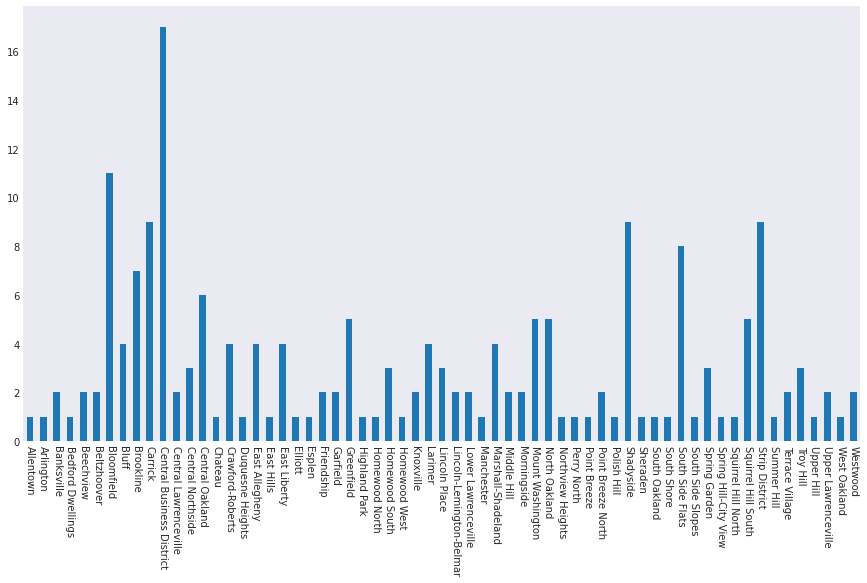

In [22]:
plt.style.use('seaborn-dark')
df["Neighborhood"].value_counts().sort_index().plot(kind='bar', rot=-90,figsize=(15, 8))

##### Now lets rank the Neighborhoods by amount of store, Since there are many Neighborhoods lets Normalize the data to give us a more accurate rating.

In [32]:
neighborhood_counts = df["Neighborhood"].value_counts()

min_count = neighborhood_counts.min()
max_count = neighborhood_counts.max()

rating_range = 10 - 1
normalize_count = (neighborhood_counts - min_count) / (max_count - min_count) * rating_range + 1

neighborhood_ratings = normalize_count.to_dict()
df['Rating'] = df['Neighborhood'].map(neighborhood_ratings)
df.dropna(axis=0, subset=['Rating'])

,Client ID,Name,Legal Name,Start Date,Street #,Street Name,State,Zip,Lat,Lon,Accuracy,Category,Neighborhood,Rating
7,52845,Sunoco A Plus Mini Market #8154,NaN,10/25/1994,5204,Interbo Ave,PA,15207.0,40.370214,-79.913195,9.0,Convenience Store,Lincoln Place,2.1250
14,200912080002,7 Eleven #36143A,NaN,11/17/2009,601,Penn Av,PA,15222.0,40.442813,-80.001884,8.0,Convenience Store,Central Business District,10.0000
19,201209070008,American Natural,Desdemona Holdings LP,8/23/2012,73,Carson St,PA,15219.0,40.430917,-80.001402,8.0,Convenience Store,South Shore,1.0000
22,200809180008,Bett's Market,NaN,9/8/2008,819,Brushton Ave,PA,15208.0,40.455264,-79.888216,8.0,Convenience Store,Homewood South,2.1250
29,37867,Co Go's #805,Co Go's,5/17/1984,4071,Beechwood Blvd,PA,15217.0,40.427102,-79.938593,8.0,Convenience Store,Greenfield,3.2500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,34765,Gorkhali Store,NaN,5/19/2014,2116,Brownsville Rd,PA,15210.0,40.392709,-79.987056,9.0,Supermarket,Carrick,5.5000
660,30265,Subha Laxmi Grocery,NaN,5/21/2014,2950,Brownsville Rd,PA,15227.0,40.381398,-79.976585,9.0,Supermarket,Carrick,5.5000
666,201110130006,Aldi #79,Aldi Inc,10/23/2012,2628,Carson St,PA,15203.0,40.426914,-79.967530,9.0,Supermarket,South Side Flats,4.9375
667,201210250002,Aldi #80,Aldi Inc,5/8/2013,5631,Baum Blvd,PA,15213.0,40.458291,-79.935066,9.0,Supermarket,Friendship,1.5625


##### Now lets filter out any repeating neighborhoods.

In [35]:
df_filtered = df.drop_duplicates(subset='Neighborhood')
df_filtered = df_filtered.dropna(axis=0, subset=['Rating']).head(30)
print(df_filtered[['Neighborhood', 'Rating']].sort_values(by='Rating', ascending=False).head(64))

                  Neighborhood   Rating
14   Central Business District  10.0000
167                 Bloomfield   6.6250
169                    Carrick   5.5000
38                   Shadyside   5.5000
71              Strip District   5.5000
75            South Side Flats   4.9375
93                   Brookline   4.3750
112            Central Oakland   3.8125
29                  Greenfield   3.2500
125              North Oakland   3.2500
62         Squirrel Hill South   3.2500
139           Crawford-Roberts   2.6875
90                   Troy Hill   2.1250
140          Central Northside   2.1250
7                Lincoln Place   2.1250
68               Spring Garden   2.1250
22              Homewood South   2.1250
82                    Garfield   1.5625
114        Upper Lawrenceville   1.5625
61             Terrace Village   1.5625
147                Morningside   1.5625
151                Middle Hill   1.5625
174                 Banksville   1.5625
128                    Chateau   1.0000


### YAAAAAAAAAAAAA!!!!!!!!!!

#### Now we are done!!!!!!

### Misael's Conclusion:

After finding the ratings for each of the neighborhoods in Pittsburgh, we can conclude that Central Business District(Downtown I think) has the most conveince store/ Supermarkets. Threfore if you are walking about and need to buy groceries or something quick to eat you'll have the best luck of finding something within walking distance in Central Business Distric.